<a href="https://colab.research.google.com/github/Nish-hub94/ML-for-Computer-vision/blob/main/Exercise%204/exe4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CIFAR10-small.zip to CIFAR10-small.zip


In [ ]:
!unzip CIFAR10-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: testing/image_0001.png  
  inflating: testing/image_0002.png  
  inflating: testing/image_0003.png  
  inflating: testing/image_0004.png  
  inflating: testing/image_0005.png  
  inflating: testing/image_0006.png  
  inflating: testing/image_0007.png  
  inflating: testing/image_0008.png  
  inflating: testing/image_0009.png  
  inflating: testing/image_0010.png  
  inflating: testing/image_0011.png  
  inflating: testing/image_0012.png  
  inflating: testing/image_0013.png  
  inflating: testing/image_0014.png  
  inflating: testing/image_0015.png  
  inflating: testing/image_0016.png  
  inflating: testing/image_0017.png  
  inflating: testing/image_0018.png  
  inflating: testing/image_0019.png  
  inflating: testing/image_0020.png  
  inflating: testing/image_0021.png  
  inflating: testing/image_0022.png  
  inflating: testing/image_0023.png  
  inflating: testing/image_0024.png  
  inflating: testing/image_0025.png  

Q2

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    kernel_sz =(3,3)
    x = Input(shape=(input_shape))
    y = Conv2D (filters =32, kernel_size =kernel_sz, strides=2, activation='relu', padding='same', kernel_initializer='he_normal')(x)
    y = Conv2D (filters =64, kernel_size =kernel_sz, strides=2, activation='relu', padding='same', kernel_initializer='he_normal')(y)
    y = Flatten()(y)
    #adding another dense layer.
    y = Dense(dense_size, activation='relu')(y)
    y = Dense(classes, activation='softmax')(y)  #, kernel_regularizer=regularizers.L2(0.03)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)



model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.2801 - loss: 1.9887 - val_accuracy: 0.4240 - val_loss: 1.6120
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4788 - loss: 1.4730 - val_accuracy: 0.4765 - val_loss: 1.4677
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5708 - loss: 1.2285 - val_accuracy: 0.4920 - val_loss: 1.4091
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6227 - loss: 1.0953 - val_accuracy: 0.5120 - val_loss: 1.3725
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6933 - loss: 0.9246 - val_accuracy: 0.5210 - val_loss: 1.3804
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7358 - loss: 0.7981 - val_accuracy: 0.5245 - val_loss: 1.3680
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8004 - loss: 0.6502 - val_accuracy: 0.5225 - val_loss: 1.4584
Epoch 8/12
313/313 ━━━━━━

Q4

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    kernel_sz =(3,3)
    x = Input(shape=(input_shape))
    y = Conv2D (filters =32, kernel_size =kernel_sz, strides=1, activation='relu', padding='same', kernel_initializer='he_normal')(x)
    y = MaxPooling2D()(y)
    y = Conv2D (filters =64, kernel_size =kernel_sz, strides=1, activation='relu', padding='same', kernel_initializer='he_normal')(y)
    y = MaxPooling2D()(y)
    y = Flatten()(y)
    #adding another dense layer.
    y = Dense(dense_size, activation='relu')(y)
    y = Dense(classes, activation='softmax')(y)  #, kernel_regularizer=regularizers.L2(0.03)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)



model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.3125 - loss: 1.8968 - val_accuracy: 0.4625 - val_loss: 1.4887
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.5112 - loss: 1.3626 - val_accuracy: 0.5180 - val_loss: 1.3493
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.5810 - loss: 1.1803 - val_accuracy: 0.5310 - val_loss: 1.2836
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.6385 - loss: 1.0329 - val_accuracy: 0.5565 - val_loss: 1.2132
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.6875 - loss: 0.9266 - val_accuracy: 0.5770 - val_loss: 1.1624
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7141 - loss: 0.8326 - val_accuracy: 0.5755 - val_loss: 1.1614
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.7545 - loss: 0.7355 - val_accuracy: 0.6010 - val_loss: 1.1244
Epoch 8/12
313/313

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vis-neurons.py to vis-neurons.py


Q5

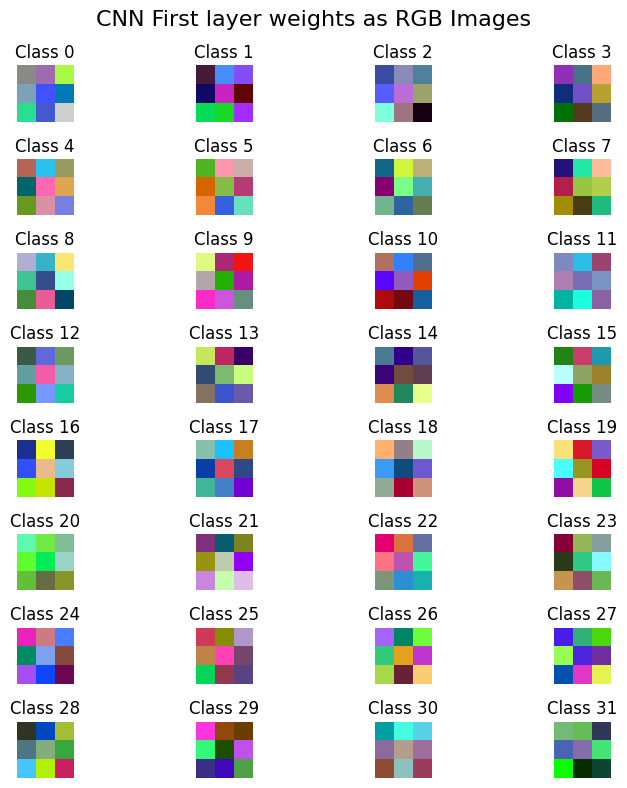

In [ ]:
# %load vis-neurons.py
from matplotlib import pyplot as plt
weights, biases = model.get_layer('conv2d_14').get_weights()
height, width, channels = 3, 3, 3
input_shape = (height, width, channels)

fig, axes = plt.subplots(8, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
  if i >= weights.shape[3]:
    break

  weight_vector = weights[:,:,:, i]
  weight_image = weight_vector.reshape(input_shape)

  min_val = weight_image.min()
  max_val = weight_image.max()
  weight_image = (weight_image - min_val) / (max_val - min_val + 1e-5) # Avoid division by 0

  ax.imshow(weight_image)
  ax.set_title(f'Class {i}')
  ax.axis('off')

plt.suptitle('CNN First layer weights as RGB Images', fontsize=16)
plt.tight_layout()
plt.show()

Q6

In [ ]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       409,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,290,308 (4.92 MB)

 Trainable params: 430,102 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 860,206 (3.28 MB)

Q7

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    kernel_sz =(3,3)
    x = Input(shape=(input_shape))
    y = Conv2D (filters =32, kernel_size =kernel_sz, strides=1, activation='relu', padding='same', kernel_initializer='he_normal')(x)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Conv2D (filters =64, kernel_size =kernel_sz, strides=1, activation='relu', padding='same', kernel_initializer='he_normal')(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Flatten()(y)
    #adding another dense layer.
    y = Dense(dense_size, activation='relu')(y)
    y = BatchNormalization()(y)
    y = Dense(classes, activation='softmax')(y)  #, kernel_regularizer=regularizers.L2(0.03)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)



model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.3629 - loss: 1.8959 - val_accuracy: 0.4840 - val_loss: 1.4773
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.6003 - loss: 1.1638 - val_accuracy: 0.5650 - val_loss: 1.2388
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.7054 - loss: 0.8864 - val_accuracy: 0.5760 - val_loss: 1.2141
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.7821 - loss: 0.6772 - val_accuracy: 0.5750 - val_loss: 1.2231
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.8548 - loss: 0.5012 - val_accuracy: 0.5705 - val_loss: 1.2737
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9102 - loss: 0.3578 - val_accuracy: 0.5890 - val_loss: 1.2663
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.9526 - loss: 0.2392 - val_accuracy: 0.5730 - val_loss: 1.3666
Epoch 8/12
313/313

In [ ]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │       409,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291,876 (4.93 MB)

 Trainable params: 430,494 (1.64 MB)

 Non-trainable params: 392 (1.53 KB)

 Optimizer params: 860,990 (3.28 MB)

Q8

In [ ]:
# %load cifar10-linear (1).py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.utils import to_categorical
from keras import regularizers
from PIL import Image

def create_model(input_shape, dense_size, classes):
    kernel_sz =(3,3)
    x = Input(shape=(input_shape))
    y = Conv2D (filters =32, kernel_size =kernel_sz, strides=1, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.05))(x)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Conv2D (filters =64, kernel_size =kernel_sz, strides=1, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.05))(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D()(y)
    y = Flatten()(y)
    #adding another dense layer.
    y = Dense(dense_size, activation='relu', kernel_regularizer=regularizers.L2(0.05))(y)
    y = BatchNormalization()(y)
    y = Dense(classes, activation='softmax', kernel_regularizer=regularizers.L2(0.05))(y)
    model = Model(inputs=x, outputs=y)
    return model

def load_labels(filename):
    with open(filename,'r') as file:
       li = file.readlines()
    label_count = len(li)
    labels = np.empty((label_count,1), dtype='int')
    i = 0
    with open(filename) as f:
        for line in f:
            labels[i] = int(line.replace("\n", ""))
            i = i + 1
    return labels

def load_images(folder, image_count, image_size):
    array_shape = (image_count, image_size[0], image_size[1], image_size[2])
    imageset = np.empty(array_shape, dtype='float')
    for i in range(0,image_count):
        image = Image.open(folder + '/image_' + "{:04d}".format(i) + '.png')
        imageset[i] = np.asarray(image)
    return imageset

def normalize_dataset(sampled_images):
	sampled_images = (sampled_images.astype('float32')-128) / 128
	return sampled_images

def split_test_val(data, splitpoint):
    return data[splitpoint:], data[:splitpoint]

########################################################################
Y_test = load_labels('testing/labels.csv')
X_test = load_images('testing', len(Y_test), (32,32,3))

y_train = load_labels('training/labels.csv')
x_train = load_images('training', len(y_train), (32,32,3))

x_train = normalize_dataset(x_train)

##### Test set preparation #####
splitpoint = 2000
X_test = normalize_dataset(X_test)
x_test, x_val = split_test_val(X_test, splitpoint)
y_test, y_val = split_test_val(Y_test, splitpoint)
print('Validation set size', x_val.shape)
print('Test set size:', x_test.shape)
print('')

class_count = len(np.unique(y_train))

# define a neural network for training
dims = (32, 32, 3)
dense_sz = 100
model = create_model(dims, dense_sz, class_count)



model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Validation set size (2000, 32, 32, 3)
Test set size: (3000, 32, 32, 3)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.3623 - loss: 18.6020 - val_accuracy: 0.4280 - val_loss: 9.8313
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.5884 - loss: 7.9836 - val_accuracy: 0.5390 - val_loss: 5.2239
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 91ms/step - accuracy: 0.6442 - loss: 4.4516 - val_accuracy: 0.5680 - val_loss: 3.6054
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.6819 - loss: 3.1047 - val_accuracy: 0.5915 - val_loss: 2.8713
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.7316 - loss: 2.4512 - val_accuracy: 0.5870 - val_loss: 2.5185
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.7427 - loss: 2.1231 - val_accuracy: 0.6040 - val_loss: 2.2765
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7692 - loss: 1.8843 - val_accuracy: 0.6105 - val_loss: 2.1684
Epoch 8/12
313/31